In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Basic Information

In [106]:
df = pd.read_csv("olympic-dataset.csv")
a = df
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [107]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [108]:
df.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [109]:
df.shape

(31165, 9)

In [110]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [112]:
df.size

280485

# Analysis started

# 1.In how many cities Summer Olympics is held so far?

In [113]:
x = df['City'].unique()
x

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [114]:
len(x)

22

In [115]:
print('In', len(x), 'cities Summer Olympics is held so far')

In 22 cities Summer Olympics is held so far


# 2.Which sport is having most number of Gold Medals so far?(Top 5)

In [116]:
data = []
df = a[a['Medal'] == 'Gold']

for sport in a['Sport'].unique():
    data.append([sport, len(df[df['Sport'] == sport])])
    
data=pd.DataFrame(data,columns=['Sport','Gold Medals'])    
x = data.sort_values(by = ['Gold Medals'] , ascending = False).head(5)
x

,Sport,Gold Medals
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


AxesSubplot(0.125,0.125;0.775x0.755)


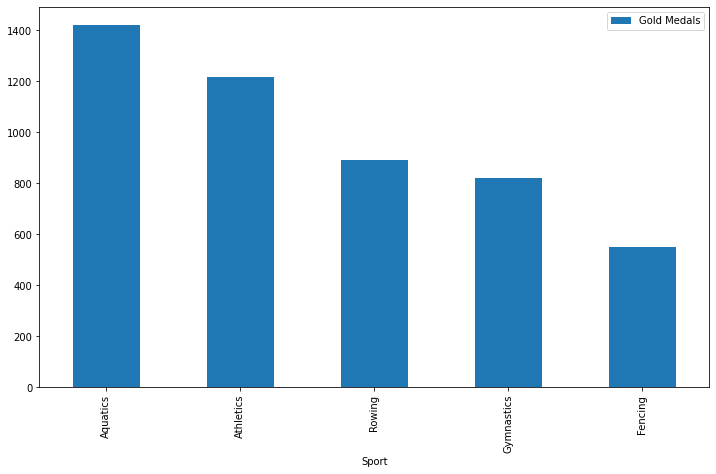

In [117]:
print(x.plot(x='Sport',y='Gold Medals',kind='bar',figsize=(12,7)))

# 3.Which sport is having most number of Medals so far?(Top 5)

In [118]:
data=[]
for sport in a['Sport'].unique():
    data.append([sport,len(a[a['Sport']==sport])])
data=pd.DataFrame(data,columns=['Sport','Medals'])
data=data.sort_values(by='Medals',ascending=False).head(5)
data


,Sport,Medals
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


AxesSubplot(0.125,0.125;0.775x0.755)


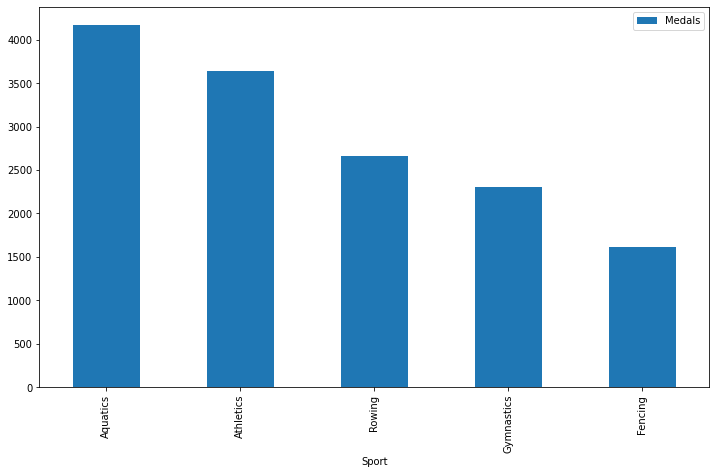

In [119]:
print(data.plot(x='Sport',y='Medals',kind='bar',figsize=(12,7)))

# 4.Which player has won most number of medals?(Top 5)

In [120]:
data=[]
for player in a['Athlete'].unique():
    data.append([player,len(a[a['Athlete']==player])])
data=pd.DataFrame(data,columns=['Player','Medals'])
data=data.sort_values(by='Medals',ascending=False).head(5)
data


,Player,Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


AxesSubplot(0.125,0.125;0.775x0.755)


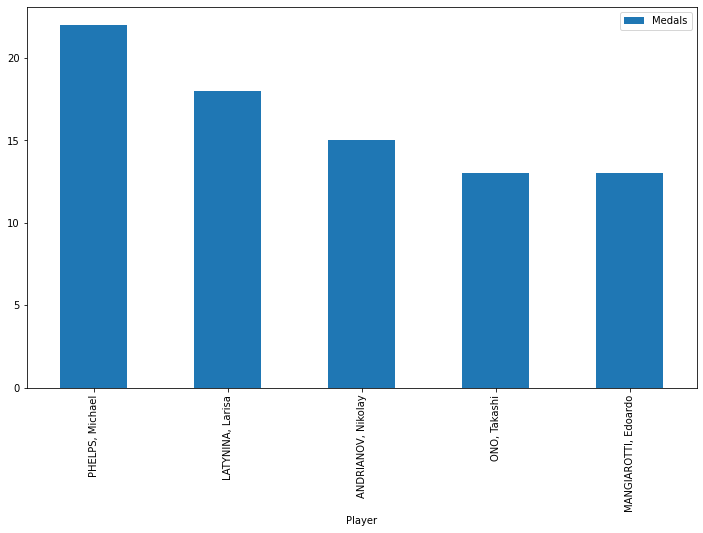

In [121]:
print(data.plot(x='Player',y='Medals',kind='bar',figsize=(12,7)))

# 5.Which player has won most number of Gold medals?(Top 5)

In [122]:
data=[]
df=a[a['Medal']=='Gold']
for player in df['Athlete'].unique():
    data.append([player,len(df[df['Athlete']==player])])
data=pd.DataFrame(data,columns=['Player','Gold Medals'])
data=data.sort_values(by='Gold Medals',ascending=False).head(5)
data


,Player,Gold Medals
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


AxesSubplot(0.125,0.125;0.775x0.755)


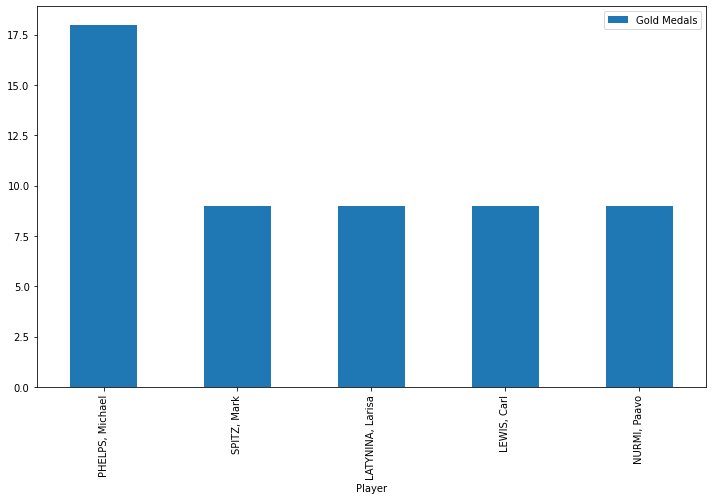

In [123]:
print(data.plot(x='Player',y='Gold Medals',kind='bar',figsize=(12,7)))

# 6.In which year India won the first Gold medal in summer olympics?

In [124]:
df = a[a['Country'] == 'IND']
x = df[df['Medal'] == 'Gold']
x.sort_values(by=['Year'])

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5526,1928,Amsterdam,Hockey,Hockey,"YUSUF, Sayed Mohamed",IND,Men,Hockey,Gold
5525,1928,Amsterdam,Hockey,Hockey,"SINGH, Jaipal",IND,Men,Hockey,Gold
5524,1928,Amsterdam,Hockey,Hockey,"SHAUKAT, Ali",IND,Men,Hockey,Gold
5523,1928,Amsterdam,Hockey,Hockey,"SEAMAN, Frederic S.",IND,Men,Hockey,Gold
...,...,...,...,...,...,...,...,...,...
16088,1980,Moscow,Hockey,Hockey,"AMARJIT RANA, Singh",IND,Men,Hockey,Gold
16087,1980,Moscow,Hockey,Hockey,"ALLAN, Schofield",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"ZAFAR, Zafar",IND,Men,Hockey,Gold
16094,1980,Moscow,Hockey,Hockey,"KAUSHIK, Maharaj Krishon",IND,Men,Hockey,Gold


In [125]:
x.sort_values(by=['Year']).min()

Year                              1928
City                         Amsterdam
Sport                           Hockey
Discipline                      Hockey
Athlete                AHKTAR, Hussain
Country                            IND
Gender                             Men
Event         10M Air Rifle (60 Shots)
Medal                             Gold
dtype: object

In [126]:
print("In 1928 India won the first Gold medal in summer olympics")

In 1928 India won the first Gold medal in summer olympics


# 7.Which event is most popular in terms on number of players?(Top 5)

In [127]:
data=[]
for event in a['Event'].unique():
    data.append([event,len(a[a['Event']==event])])
data=pd.DataFrame(data,columns=['Event','No.of.Players'])
data=data.sort_values(by='No.of.Players',ascending=False).head(5)
data


,Event,No.of.Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


AxesSubplot(0.125,0.125;0.775x0.755)


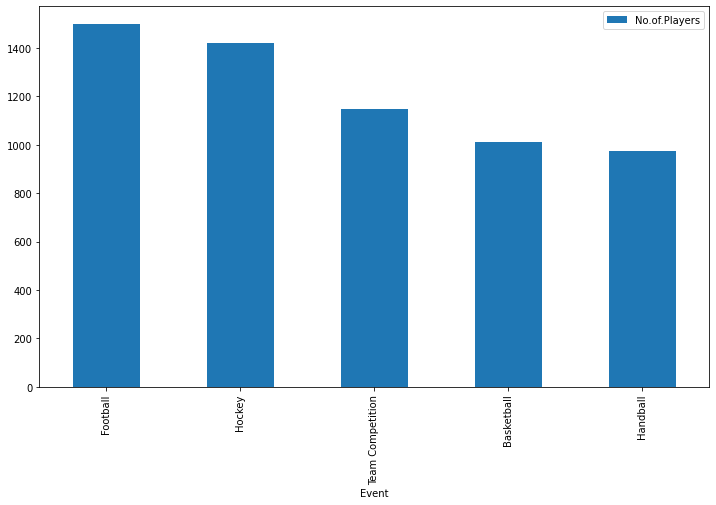

In [128]:
print(data.plot(x='Event',y='No.of.Players',kind='bar',figsize=(12,7)))

# 8.Which Sport is having Most female gold Medalists?

In [129]:
a['Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [130]:
data = []
df = a[a['Gender'] == 'Women']
x = df[df['Medal'] == 'Gold']
x.sort_values(by = ['Sport'])
for sport in x['Sport'].unique():
    data.append([sport, len(x[x['Sport'] == sport])])
    
data=pd.DataFrame(data,columns=['Event','No.of.Female Players'])
y = data.sort_values(by = ['No.of.Female Players'], ascending = False).head(5)
y

,Event,No.of.Female Players
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166


AxesSubplot(0.125,0.125;0.775x0.755)


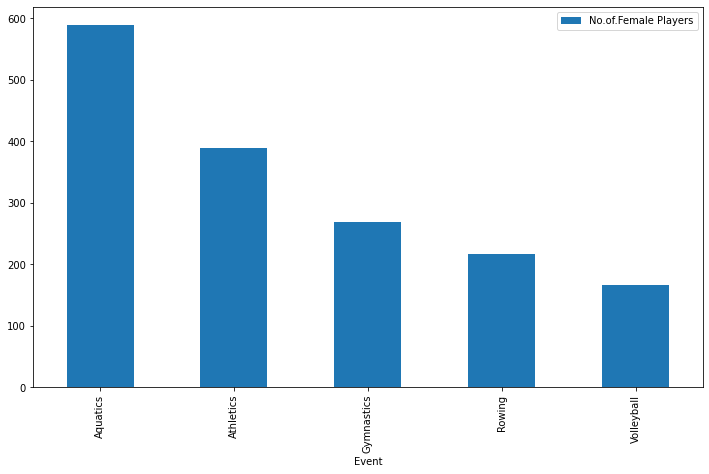

In [131]:
print(y.plot(x='Event',y='No.of.Female Players',kind='bar',figsize=(12,7)))